In [225]:
import sklearn
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)


In [226]:
df = pd.concat([X, y], axis=1)
df.head(10)

# 変数	意味
# CRIM	犯罪率
# ZN	大規模住宅用地の割合
# INDUS	非小売業の割合
# CHAS	川沿いかどうか（0/1）
# NOX	大気汚染
# RM	平均部屋数
# AGE	古い住宅の割合
# DIS	雇用中心地までの距離
# RAD	高速道路アクセス
# TAX	固定資産税
# PTRATIO	生徒教師比
# B	黒人比率指標
# LSTAT	低所得者層の割合


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [227]:
boston = fetch_openml(name="boston", as_frame=True, version=1)

X = boston.data
y = boston.target.astype(float)


In [228]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("columns:", list(X.columns))


X shape: (506, 13)
y shape: (506,)
columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [229]:
df = pd.concat([X, y.rename("PRICE")], axis=1)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [230]:
X.describe()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [231]:
y.describe()


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

<Axes: >

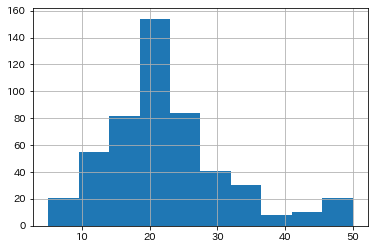

In [232]:
y.hist(bins=10)


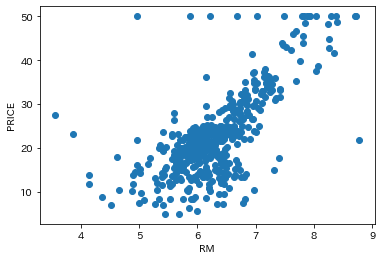

In [233]:
plt.scatter(X["RM"], y)
plt.xlabel("RM")
plt.ylabel("PRICE")
plt.show()


In [234]:
df = X.copy()
df["PRICE"] = y

corr = df.corr()["PRICE"].sort_values(ascending=False)
corr


PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

In [235]:
X_rm = X[["RM"]]
y_price = y

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_rm, y_price)
model.predict([[5]])

# PRICE = a(傾き)× RM + b(切片)


/root/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.83992413])

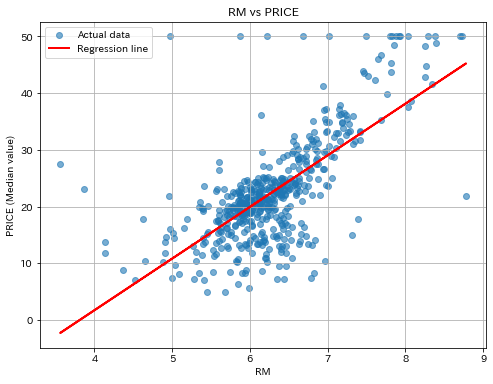

In [236]:
y_pred = model.predict(X_rm)
plt.figure(figsize=(8, 6))
plt.scatter(X_rm, y_price, alpha=0.6, label="Actual data")

plt.plot(X_rm, y_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("RM")
plt.ylabel("PRICE (Median value)")
plt.title("RM vs PRICE")
plt.legend()
plt.grid(True)

plt.show()


In [237]:
# scikit-learn ML(線形)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse) # 予測誤差
print("R^2 :", r2) # 適合率

RMSE: 4.930811680696355
R^2 : 0.6684624359643558


In [238]:
# RandomForest ML(決定木)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE:", rmse_rf) # 予測誤差
print("R^2 :", r2_rf) # 適合率

RMSE: 2.9877484874006948
R^2 : 0.878273823614832


In [239]:
# GradientBoosting ML(勾配)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("RMSE:", rmse_gbr)
print("R^2 :", r2_gbr)

RMSE: 2.60543859471298
R^2 : 0.90743270047886


In [278]:
# lightgbm ML(勾配ブースティング)
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

lgbm.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    callbacks=None,
    #early_stopping_rounds=100,
)

y_pred = lgbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2 :", r2)

/root/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/root/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's rmse: 8.47276	valid_0's l2: 71.7877
[2]	valid_0's rmse: 8.2897	valid_0's l2: 68.7191
[3]	valid_0's rmse: 8.11371	valid_0's l2: 65.8324
[4]	valid_0's rmse: 7.94231	valid_0's l2: 63.0803
[5]	valid_0's rmse: 7.77335	valid_0's l2: 60.4249
[6]	valid_0's rmse: 7.60755	valid_0's l2: 57.8748
[7]	valid_0's rmse: 7.44424	valid_0's l2: 55.4168
[8]	valid_0's rmse: 7.2937	valid_0's l2: 53.1981
[9]	valid_0's rmse: 7.13892	valid_0's l2: 50.9642
[10]	valid_0's rmse: 6.99731	valid_0's l2: 48.9623
[11]	valid_0's rmse: 6.86399	valid_0's l2: 47.1143
[12]	valid_0's rmse: 6.74708	valid_0's l2: 45.5231
[13]	valid_0's rmse: 6.62614	valid_0's l2: 43.9057
[14]	valid_0's rmse: 6.50472	valid_0's l2: 42.3114
[15]	valid_0's rmse: 6.39831	valid_0's l2: 40.9383
[16]	valid_0's rmse: 6.2968	valid_0's l2: 39.6497
[17]	valid_0's rmse: 6.19173	valid_0's l2: 38.3375
[18]	valid_0's rmse: 6.08667	valid_0's l2: 37.0475
[19]	valid_0's rmse: 5.97369	valid_0's l2: 35.685
[20]	valid_0's rmse: 5.86887	valid_0's l2: 3

[430]	valid_0's rmse: 2.97988	valid_0's l2: 8.87968
[431]	valid_0's rmse: 2.98045	valid_0's l2: 8.88311
[432]	valid_0's rmse: 2.97932	valid_0's l2: 8.87634
[433]	valid_0's rmse: 2.9791	valid_0's l2: 8.87503
[434]	valid_0's rmse: 2.97883	valid_0's l2: 8.87343
[435]	valid_0's rmse: 2.97919	valid_0's l2: 8.87559
[436]	valid_0's rmse: 2.97915	valid_0's l2: 8.87536
[437]	valid_0's rmse: 2.97846	valid_0's l2: 8.87124
[438]	valid_0's rmse: 2.97717	valid_0's l2: 8.86353
[439]	valid_0's rmse: 2.97722	valid_0's l2: 8.86387
[440]	valid_0's rmse: 2.97612	valid_0's l2: 8.8573
[441]	valid_0's rmse: 2.97709	valid_0's l2: 8.86306
[442]	valid_0's rmse: 2.97658	valid_0's l2: 8.86001
[443]	valid_0's rmse: 2.97653	valid_0's l2: 8.85974
[444]	valid_0's rmse: 2.97585	valid_0's l2: 8.85571
[445]	valid_0's rmse: 2.97365	valid_0's l2: 8.84261
[446]	valid_0's rmse: 2.97305	valid_0's l2: 8.839
[447]	valid_0's rmse: 2.97291	valid_0's l2: 8.83822
[448]	valid_0's rmse: 2.97222	valid_0's l2: 8.83408
[449]	valid_0's 

[824]	valid_0's rmse: 2.81195	valid_0's l2: 7.90709
[825]	valid_0's rmse: 2.81218	valid_0's l2: 7.90833
[826]	valid_0's rmse: 2.81262	valid_0's l2: 7.9108
[827]	valid_0's rmse: 2.8133	valid_0's l2: 7.91466
[828]	valid_0's rmse: 2.81371	valid_0's l2: 7.91697
[829]	valid_0's rmse: 2.81401	valid_0's l2: 7.91867
[830]	valid_0's rmse: 2.81362	valid_0's l2: 7.91645
[831]	valid_0's rmse: 2.81346	valid_0's l2: 7.91556
[832]	valid_0's rmse: 2.81205	valid_0's l2: 7.90765
[833]	valid_0's rmse: 2.81207	valid_0's l2: 7.90774
[834]	valid_0's rmse: 2.81242	valid_0's l2: 7.90972
[835]	valid_0's rmse: 2.81236	valid_0's l2: 7.90939
[836]	valid_0's rmse: 2.81231	valid_0's l2: 7.90908
[837]	valid_0's rmse: 2.81235	valid_0's l2: 7.90932
[838]	valid_0's rmse: 2.81275	valid_0's l2: 7.91154
[839]	valid_0's rmse: 2.8124	valid_0's l2: 7.90962
[840]	valid_0's rmse: 2.81188	valid_0's l2: 7.90666
[841]	valid_0's rmse: 2.81237	valid_0's l2: 7.90944
[842]	valid_0's rmse: 2.81142	valid_0's l2: 7.90409
[843]	valid_0's

[1242]	valid_0's rmse: 2.79912	valid_0's l2: 7.83506
[1243]	valid_0's rmse: 2.79879	valid_0's l2: 7.83324
[1244]	valid_0's rmse: 2.79919	valid_0's l2: 7.83547
[1245]	valid_0's rmse: 2.7991	valid_0's l2: 7.83496
[1246]	valid_0's rmse: 2.79922	valid_0's l2: 7.83565
[1247]	valid_0's rmse: 2.79921	valid_0's l2: 7.83559
[1248]	valid_0's rmse: 2.79948	valid_0's l2: 7.83708
[1249]	valid_0's rmse: 2.79968	valid_0's l2: 7.8382
[1250]	valid_0's rmse: 2.79952	valid_0's l2: 7.83729
[1251]	valid_0's rmse: 2.79958	valid_0's l2: 7.83765
[1252]	valid_0's rmse: 2.79976	valid_0's l2: 7.83867
[1253]	valid_0's rmse: 2.79967	valid_0's l2: 7.83817
[1254]	valid_0's rmse: 2.7997	valid_0's l2: 7.83831
[1255]	valid_0's rmse: 2.79943	valid_0's l2: 7.83682
[1256]	valid_0's rmse: 2.79938	valid_0's l2: 7.83653
[1257]	valid_0's rmse: 2.79933	valid_0's l2: 7.83622
[1258]	valid_0's rmse: 2.79937	valid_0's l2: 7.8365
[1259]	valid_0's rmse: 2.79933	valid_0's l2: 7.83626
[1260]	valid_0's rmse: 2.79946	valid_0's l2: 7.836

[1617]	valid_0's rmse: 2.81375	valid_0's l2: 7.9172
[1618]	valid_0's rmse: 2.8141	valid_0's l2: 7.91917
[1619]	valid_0's rmse: 2.81457	valid_0's l2: 7.92178
[1620]	valid_0's rmse: 2.8147	valid_0's l2: 7.92255
[1621]	valid_0's rmse: 2.81452	valid_0's l2: 7.92154
[1622]	valid_0's rmse: 2.81456	valid_0's l2: 7.92173
[1623]	valid_0's rmse: 2.81438	valid_0's l2: 7.92076
[1624]	valid_0's rmse: 2.81427	valid_0's l2: 7.92012
[1625]	valid_0's rmse: 2.81406	valid_0's l2: 7.91894
[1626]	valid_0's rmse: 2.81433	valid_0's l2: 7.92044
[1627]	valid_0's rmse: 2.81435	valid_0's l2: 7.92054
[1628]	valid_0's rmse: 2.81413	valid_0's l2: 7.91934
[1629]	valid_0's rmse: 2.81443	valid_0's l2: 7.92103
[1630]	valid_0's rmse: 2.81476	valid_0's l2: 7.92288
[1631]	valid_0's rmse: 2.81486	valid_0's l2: 7.92345
[1632]	valid_0's rmse: 2.81489	valid_0's l2: 7.9236
[1633]	valid_0's rmse: 2.81489	valid_0's l2: 7.9236
[1634]	valid_0's rmse: 2.81474	valid_0's l2: 7.92277
[1635]	valid_0's rmse: 2.81479	valid_0's l2: 7.9230

RMSE: 2.8190630501666805
R^2 : 0.8916308945436373


In [279]:
importance = pd.Series(
    gbr_loaded.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(importance)

RM         0.409530
LSTAT      0.378569
DIS        0.071474
NOX        0.034057
PTRATIO    0.031918
CRIM       0.025876
AGE        0.018838
TAX        0.012741
B          0.012398
RAD        0.002251
INDUS      0.001626
ZN         0.000522
CHAS       0.000202
dtype: float64


In [246]:
import joblib
joblib.dump(gbr, "gbr_model.pkl")

['gbr_model.pkl']

In [247]:
gbr_loaded = joblib.load("gbr_model.pkl")

In [272]:
new_data = {
    "CRIM": 0.1,
    "ZN": 0.0,
    "INDUS": 8.0,
    "CHAS": 0,
    "NOX": 0.5,
    "RM": 20.5,
    "AGE": 60.0,
    "DIS": 4.0,
    "RAD": 4,
    "TAX": 300,
    "PTRATIO": 18.0,
    "B": 390.0,
    "LSTAT": 15.0
}

X_new = pd.DataFrame([new_data])


In [273]:
pred_price = gbr_loaded.predict(X_new)[0]
print("predict PRICE/$1000:", pred_price)

predict PRICE/$1000: 37.27087158712644


In [ ]:
# 次のステップ
# ① 特徴量取捨選択&新たな特徴量を考える

# (例)
# 学区の質(誰かの主観で数値に出来ない)
# 駅距離(m:標準化)
# 東京駅までの距離(m:標準化)
# 南向き、北向き、東向き、西向き(ワンホットエンコーディング)
# 犯罪の質(誰かの主観で数値に出来ない)
# 将来の期待値(誰かの主観で数値に出来ない)

# ② 学習時のパラメータを変えてみる

# 機械学習の適合率の上限は0.90-0.95なので0.90は十分凄い

